# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Reading Data

In [ ]:
data = pd.read_csv('/content/hour - hour.csv')

In [ ]:
data.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


# Check for
1. total rows and columns
2. null values
3. Dtype of columns

In [ ]:
data.info(); data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Checking for duplicate Values**

In [ ]:
data.duplicated().sum()

0

**Droping instant column as it is only used to identify each row**


In [ ]:
data = data.drop(['instant'], axis = 1)
data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Converting dteday to datetime datatype

In [ ]:
df = data
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

# Visualizations

**Boxplot of count to find outliers**

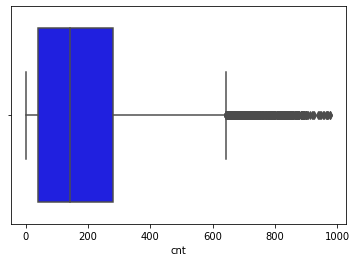

In [ ]:
sns.boxplot(x = 'cnt', data = df, color="blue")
plt.show()

*From this we can say that there are outliers having value greater than 600 as most of the data lies below 300.*

**Histogram for count**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


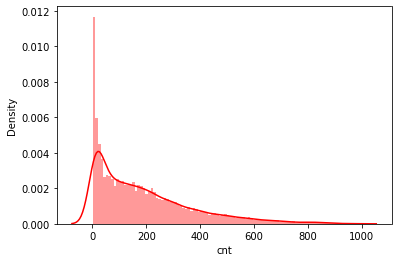

In [ ]:
sns.distplot(df['cnt'], bins = 100, color = 'red')
plt.show()

*Data in count column is skewed towards right*

**Plot for numeric features with count**

In [ ]:
numeric_features = df[['temp','atemp','hum','windspeed']]
numeric_features.head()

,temp,atemp,hum,windspeed
0,0.24,0.2879,0.81,0.0
1,0.22,0.2727,0.80,0.0
2,0.22,0.2727,0.80,0.0
3,0.24,0.2879,0.75,0.0
4,0.24,0.2879,0.75,0.0


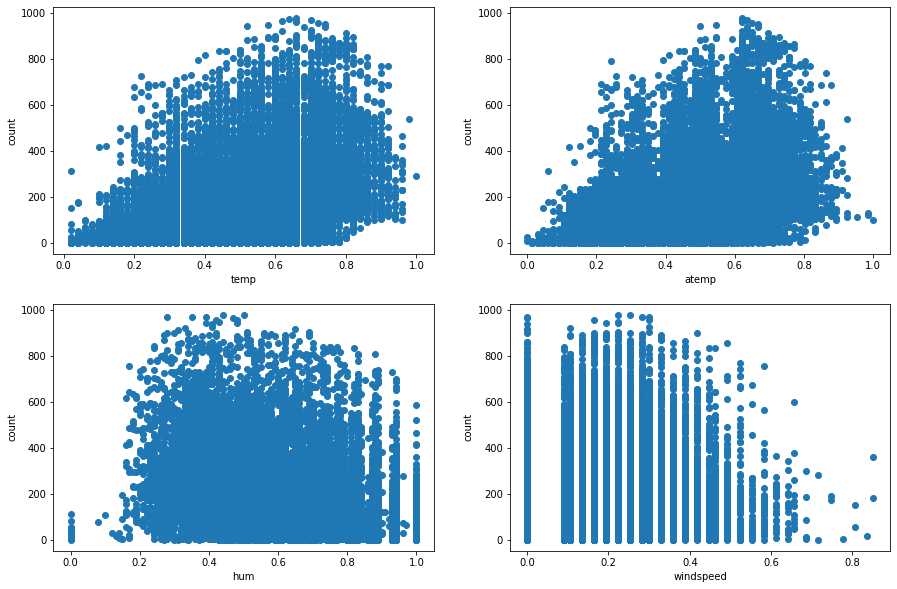

In [ ]:
fig = plt.figure(figsize=(15,10))

for i, num in enumerate(numeric_features):
    ax = fig.add_subplot(2,2,i+1)
    ax.scatter(df[num], df['cnt'])
    ax.set_ylabel('count')
    ax.set_xlabel(num)
plt.show()

*From this we can say it is difficult to understand relation between numeric features and count.*

In [ ]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

**Plot for categorical features with count**

[Text(0, 0.5, 'count'), Text(0.5, 0, 'weathersit')]

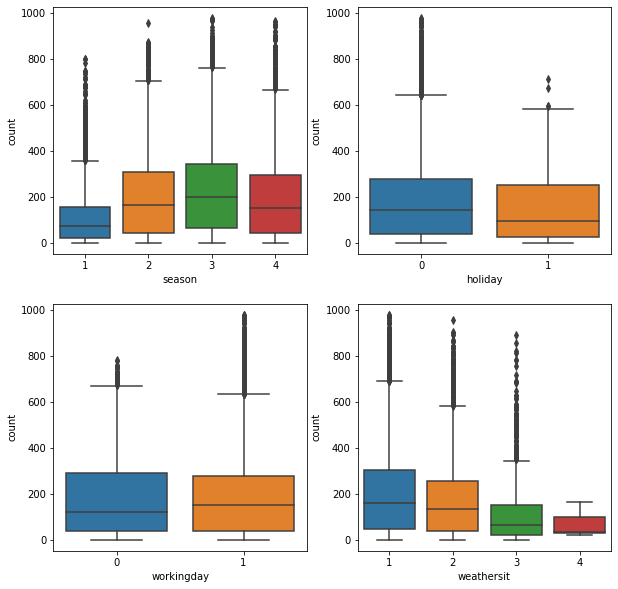

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10, 10))
sns.boxplot(data = df, y = 'cnt', x = 'season', ax = axes[0][0])
sns.boxplot(data = df, y = 'cnt', x = 'holiday', ax = axes[0][1])
sns.boxplot(data = df, y = 'cnt', x = 'workingday', ax = axes[1][0])
sns.boxplot(data = df, y = 'cnt', x = 'weathersit', ax = axes[1][1])

axes[0][0].set(xlabel = 'season', ylabel = 'count')
axes[0][1].set(xlabel = 'holiday', ylabel = 'count')
axes[1][0].set(xlabel = 'workingday', ylabel = 'count')
axes[1][1].set(xlabel = 'weathersit', ylabel = 'count')

# Correlation of features with cont

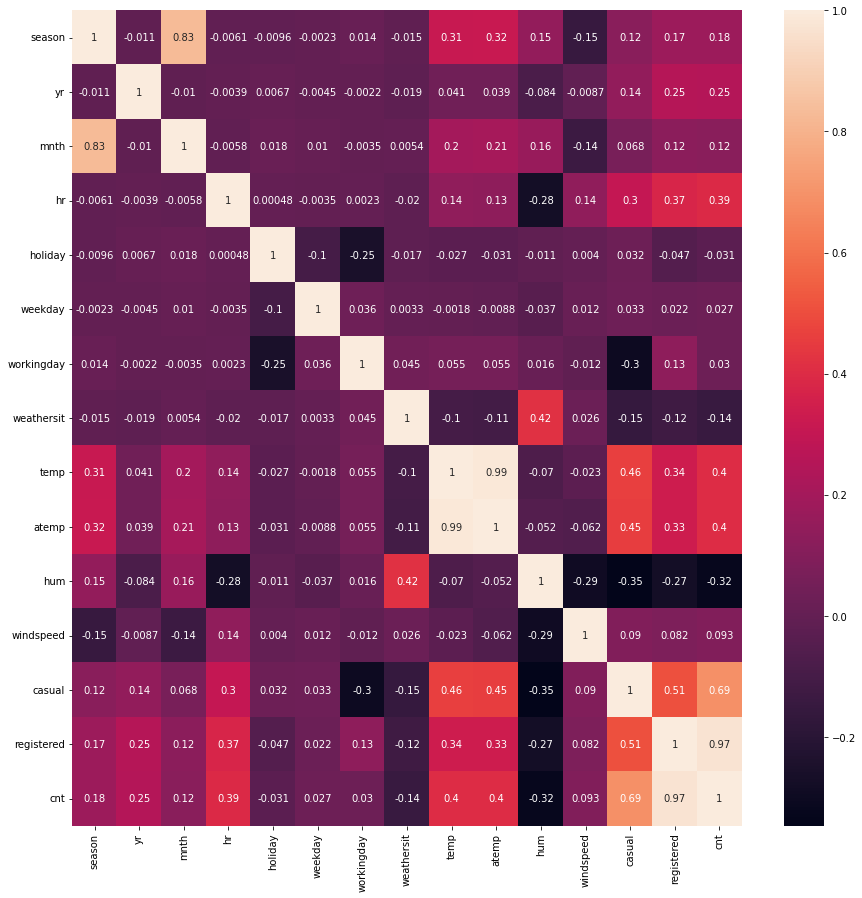

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot= True)

Some insights
1. casual and registerd have a mathematically high correlation whith count but since even a registerd person can also take bike and a casual person also so this feature can be dropped.
2. holiday is having negtive corr. this shows that if there are less holidays more bike rentals took place.

# Data preprocessing

In [ ]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [ ]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df['day'] = df['dteday'].apply(lambda t:t.day)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


*Dropping columns which are not needed*

In [ ]:
df = df.drop(['dteday', 'casual', 'registered'], axis = 1)
df.head(1)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1


*Taking log for count column to remove skewness*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


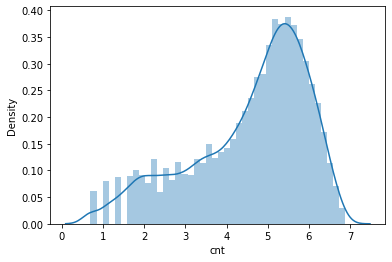

In [ ]:
df['cnt'] = np.log1p(df['cnt'])
sns.distplot(df['cnt'])

# Removing outliers

In [ ]:
df = df[np.abs(df['cnt']) - df['cnt'].mean() <= (3*df['cnt'].std())]

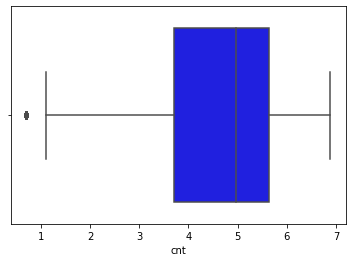

In [ ]:
sns.boxplot(x = 'cnt', data = df, color="blue")
plt.show()

# Splitting data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['cnt'],axis = 1), df['cnt'], test_size= 0.3)

# RMSE

In [ ]:
def rmse(y,pred):
    squared_error = (y - pred)**2
    rsme_value = np.sqrt(np.mean(squared_error))
    return rsme_value

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

pred_lr = linear_model.predict(X_test)

In [ ]:
print('-'*36)
print(f'|RMSE (Linear Regression): {rmse(y_test,pred_lr):.2f}    |')
print("|"+'-'*34+"|")
print(f'|r2 Score (Linear Regression): {r2_score(y_test,pred_lr):.2f}|')
print('-'*36)

------------------------------------
|RMSE (Linear Regression): 1.01    |
|----------------------------------|
|r2 Score (Linear Regression): 0.48|
------------------------------------


# Random Forest

*With default hyperparameters*

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 42)
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)

In [ ]:
# rfr_train_preds = rfr.predict(X_train)
# r2_score(y_train, rfr_train_preds)

# Evaluation

In [ ]:
print('-'*32)
print(f'|RMSE (Random Forest): {rmse(y_test,pred):.2f}    |')
print("|"+'-'*30+"|")
print(f'|r2 Score (Random Forest): {r2_score(y_test,pred):.2f}|')
print('-'*32)

--------------------------------
|RMSE (Random Forest): 0.31    |
|------------------------------|
|r2 Score (Random Forest): 0.95|
--------------------------------


*Checking with different max depth and random state 42*

In [ ]:
def check_max_depth_rfr(X_train, y_train):
    res = {}
    for i in range(3,20):
        rfr_model = RandomForestRegressor(max_depth = i, random_state = 42)
        rfr_model.fit(X_train, y_train)
        rfr_test_prediction = rfr_model.predict(X_test)
        res[i] = r2_score(y_test,rfr_test_prediction)
    return res

In [ ]:
check_max_depth_rfr(X_train, y_train)

{3: 0.7453920873306864,
 4: 0.788415441555597,
 5: 0.8431600378760941,
 6: 0.8721290527531489,
 7: 0.8940012554428011,
 8: 0.9156580777941437,
 9: 0.9309923486964025,
 10: 0.9407265761857236,
 11: 0.9451640201001197,
 12: 0.9478868842245272,
 13: 0.9495082005958797,
 14: 0.9503406311837784,
 15: 0.9509266773126296,
 16: 0.9510779114413868,
 17: 0.9513141742568798,
 18: 0.9513469711767863,
 19: 0.9514139976299361}

**From this we can say that from max depth 11 and random state = 42 the model is giving a similar r2 score**

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 42)
dt_model.fit(X_train, y_train)
dt_test_prediction = dt_model.predict(X_test)

# Evaluation

In [ ]:
print('-'*32)
print(f'|RMSE (Decision Tree): {rmse(y_test,dt_test_prediction):.2f}    |')
print("|"+'-'*30+"|")
print(f'|r2 Score (Decision Tree): {r2_score(y_test,dt_test_prediction):.2f}|')
print('-'*32)

--------------------------------
|RMSE (Decision Tree): 0.43    |
|------------------------------|
|r2 Score (Decision Tree): 0.91|
--------------------------------


*Checking with different max depth and random state 42*

In [ ]:
def check_max_depth_dt(X_train, y_train):
    res = {}
    for i in range(3,20):
        dt_model = DecisionTreeRegressor(max_depth = i, random_state = 42)
        dt_model.fit(X_train, y_train)
        dt_test_prediction = dt_model.predict(X_test)
        res[i] = r2_score(y_test,dt_test_prediction)
    return res

In [ ]:
check_max_depth_dt(X_train, y_train)

{3: 0.7336321650152566,
 4: 0.7784623051455742,
 5: 0.8267042925364867,
 6: 0.8490289830367312,
 7: 0.8692172688443741,
 8: 0.8810536713463841,
 9: 0.8883275874175933,
 10: 0.9083114989626473,
 11: 0.915406821922433,
 12: 0.913939660324116,
 13: 0.9096082015417908,
 14: 0.9074783149827984,
 15: 0.904602806502632,
 16: 0.9046364674866079,
 17: 0.9033424898456138,
 18: 0.9031094031722569,
 19: 0.9021205424918705}

*From this we can say that for max depth from 9 to 16 and random state = 42 we have received similar r2 score*

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.metrics import accuracy_score
knn_model = KNeighborsRegressor(n_neighbors=2, metric = 'euclidean')
knn_model.fit(X_train, y_train)

pred_test = knn_model.predict(X_test)

# **Evaluation**

In [ ]:
print('-'*22)
print(f'|RMSE (KNN): {rmse(y_test,pred_test):.2f}    |')
print("|"+'-'*20+"|")
print(f'|r2 Score (KNN): {r2_score(y_test,pred_test):.2f}|')
print('-'*22)

----------------------
|RMSE (KNN): 0.47    |
|--------------------|
|r2 Score (KNN): 0.89|
----------------------


#Graphs

[Text(0.5, 1.0, 'Renting behaviour seasonally')]

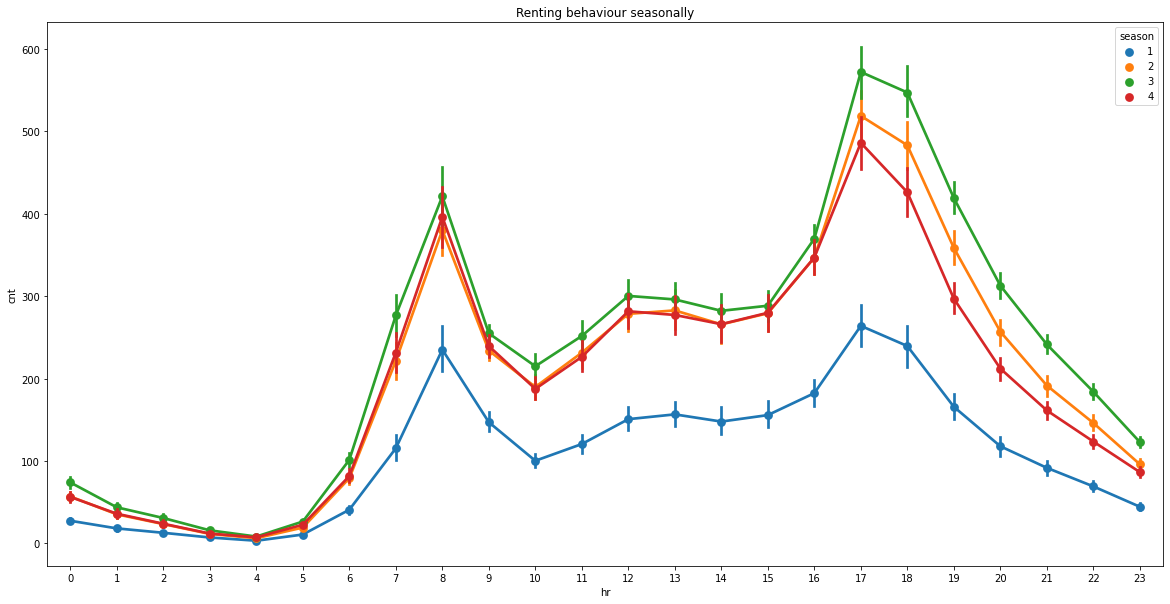

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr', y='cnt', hue='season', ax=ax)
ax.set(title='Renting behaviour seasonally')

[Text(0.5, 1.0, 'demand of bikes across the month')]

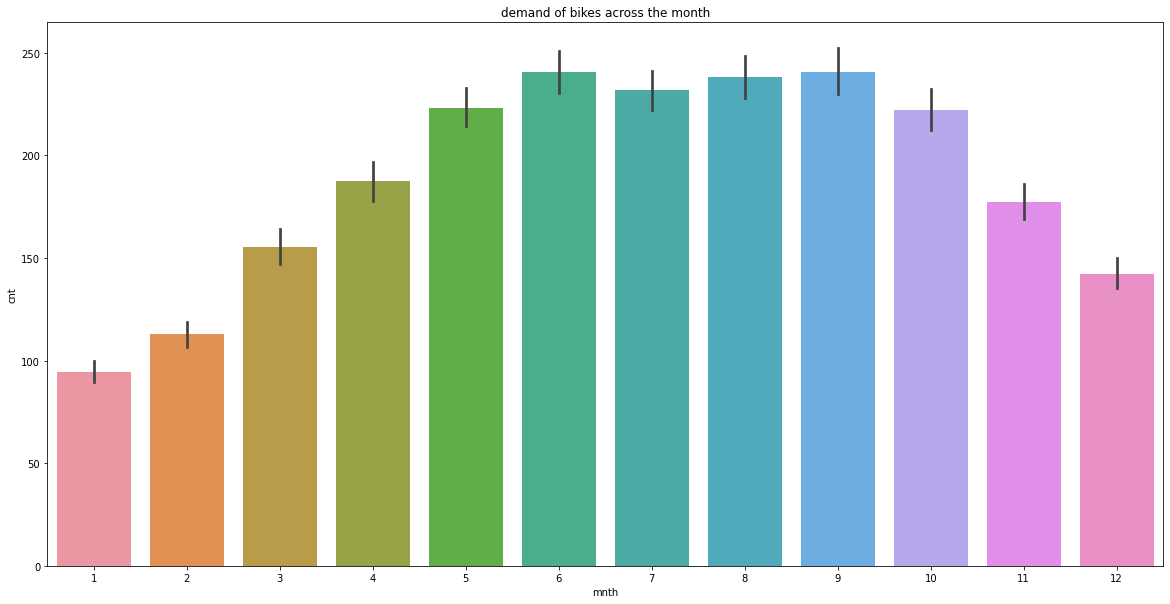

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df,x='mnth',y='cnt',ax=ax)
ax.set(title='demand of bikes across the month')

[Text(0, 0.5, 'Count(in thousands)'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Total count of bikes rented')]

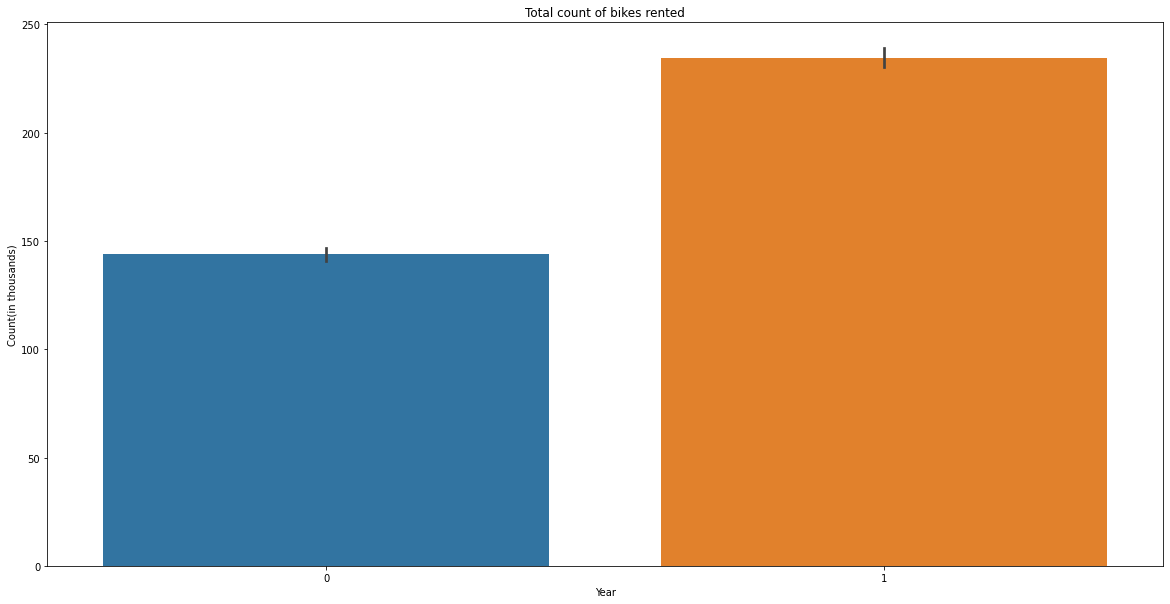

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=data, x='yr', y='cnt', ax=ax)
ax.set(title='Total count of bikes rented', xlabel = "Year", ylabel= "Count(in thousands)")

Text(0.5, 1.0, 'Which month of each season has the highest rent')

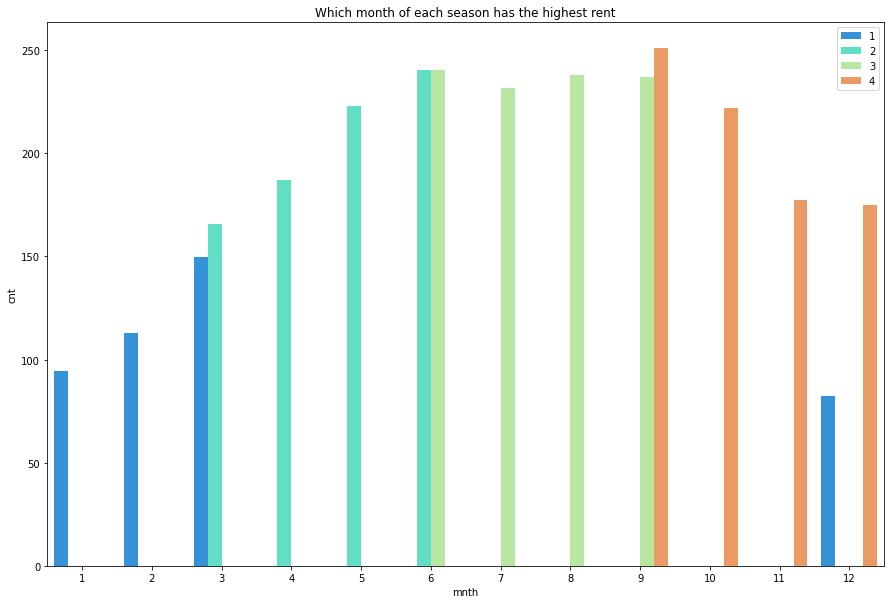

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='mnth',y='cnt',hue='season', data=df,palette='rainbow', ci = None)
plt.legend(loc='upper right')
plt.xlabel('mnth')
plt.ylabel('cnt')
plt.title('Which month of each season has the highest rent')


**Number of bikes rented on a casual basis per season
yearly.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'season (1:spring, 2:summer, 3:fall, 4:winter)')

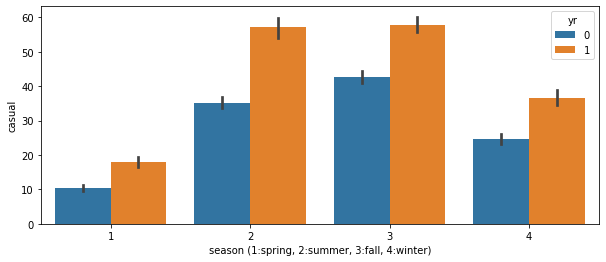

In [ ]:
plt.figure(figsize=[10,4])
sns.barplot(data['season'],data['casual'], hue = data['yr'])
plt.xlabel('season (1:spring, 2:summer, 3:fall, 4:winter)')

**Number of bikes rented on a Registered basis per season yearly.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'season (1:spring, 2:summer, 3:fall, 4:winter)')

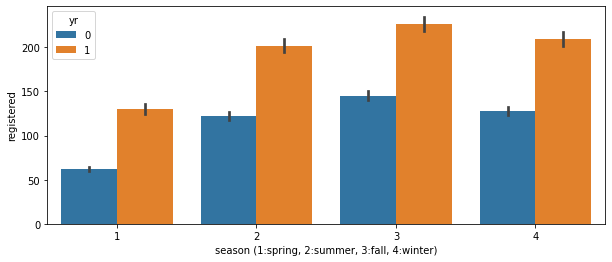

In [ ]:
plt.figure(figsize=[10,4])
sns.barplot(data['season'],data['registered'], hue = data['yr'])
plt.xlabel('season (1:spring, 2:summer, 3:fall, 4:winter)')

<pre> After evaluating different models, it is found that random forest is best among all. </pre>